# Desafio técnico para a vaga de Time de Dados e Projetos na Bemol



## Importando bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Lendo o dataset

In [2]:
df_questao1 = pd.read_excel('_Desafio 2.0 - Relatório.xlsx', sheet_name="Dados - Questão 1")
df_questao2 = pd.read_excel('_Desafio 2.0 - Relatório.xlsx', sheet_name="Dados - Questão 2")

## Organizando algumas informações do dataset


In [3]:
#Renomeando o nome das colunas
df_questao1.columns = ['num_compra', 'usuario', 'nome', 'tipo_mercadoria', 'filial', 'data_compra', 'valor_compra', 'imposto', 'cpf_na_nota']
df_questao2.columns = ['', 'data_compra', 'inicio', 'termino', 'unidade', 'cod_loja', 'produto', 'ean', 'valor_unitario_sem_imposto', 'quantidade', 'valor_total', 'imposto', 'dinheiro_de_volta']

#Renomeando os valores "Na~o" para "Não" da coluna "cpf_na_nota"
df_questao1['cpf_na_nota'] = df_questao1['cpf_na_nota'].apply(lambda x : "Não" if(x=="Na~o") else "Sim")

#Renomeando o nome das filiais de "Loja Lábrea " e "Loja Manicor é " para "Loja Lábrea" e "Loja Manicoré"
df_questao1['filial'] = df_questao1['filial'].apply(lambda x : "Loja Lábrea" if(x=='Loja Lábrea ') else x)
df_questao1['filial'] = df_questao1['filial'].apply(lambda x : "Loja Manicoré" if(x=='Loja Manicor é ') else x)

In [4]:
df_questao1

,num_compra,usuario,nome,tipo_mercadoria,filial,data_compra,valor_compra,imposto,cpf_na_nota
0,24937847,295,ANDERSON,SPLIT 8501 À 10000,Loja Autazes,2020-04-06 12:25:12.666,2582.400,116.20800,Sim
1,23600787,331,RAIMUNDO,SPLIT INV 8501À10000,Loja Manicoré,2020-04-06 14:03:54.682,1919.280,86.36760,Sim
2,24298956,370,ROSILANE,SPLIT ACIMA DE 30000,Loja Manicoré,2020-04-06 14:35:14.125,10121.040,455.44680,Sim
3,23802765,460,SANDRA,SPLIT 10001 À 18000,Loja Manicoré,2020-04-06 14:59:19.759,11724.000,527.58000,Sim
4,22559356,538,JAMERSON,SPLIT 18001 À 30000,Loja Manicoré,2020-04-06 15:32:43.879,1157.280,52.07760,Sim
...,...,...,...,...,...,...,...,...,...
13872,21881841,465263,SOARES,HIPOGLICEMI ORAL REF,Loja Lábrea,2019-01-21 18:43:49.000,42.380,1.90710,Sim
13873,21881843,465620,SANTANA,ANTIHELMÍNTICO REF,Loja Lábrea,2019-05-13 14:12:40.000,59.960,2.69820,Sim
13874,21881845,466079,SALES,ANTIVERTIGINOSO REF,Loja Lábrea,2019-05-01 14:37:10.000,37.480,1.68660,Sim
13875,21881847,466205,AURELIANO,ESTIMULANTE REF,Loja Lábrea,2019-05-05 16:56:51.000,82.536,3.71412,Sim


In [5]:
df_questao2

,,data_compra,inicio,termino,unidade,cod_loja,produto,ean,valor_unitario_sem_imposto,quantidade,valor_total,imposto,dinheiro_de_volta
0,430,2019-07-05 10:30:41,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
1,430,2019-07-05 11:58:18,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
2,430,2019-07-05 14:06:58,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
3,430,2019-07-05 14:50:06,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
4,430,2019-07-05 16:04:56,2019-07-05,2019-07-20,Unidade Manaus 1,49618556000135,Smart Pro,190199383180,3000,3,9993.87,1128.87,135.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,430,2019-07-02 09:40:35,2019-07-05,2019-07-20,Unidade Manaus 3,49618556000216,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
895,430,2019-07-02 09:41:57,2019-07-05,2019-07-20,Unidade Manaus 3,49618556000216,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0
896,430,2019-07-02 09:39:47,2019-07-05,2019-07-20,Unidade Manaus 3,49618556000216,Smart Pro,190199383180,3000,3,9993.87,1128.87,135.0
897,430,2019-07-02 09:36:06,2019-07-05,2019-07-20,Unidade Manaus 3,49618556000216,Smart Pro,190199383180,3000,1,3331.29,376.29,45.0


# Análise exploratória dos dados

## Visualizando os 3 vendedores que mais venderam em cada unidade/loja <br>(Dados - Questão1)

In [6]:
#Agrupando por filiais e contando a quantidade de ocorrências (vendas) de cada usuário/vendedor.
df_quemMaisVendeu = df_questao1.groupby(by=['filial', 'usuario', 'nome']).count()['num_compra'].to_frame()
df_quemMaisVendeu.columns = ['quantidade_vendas']

#Selecionando os 3 vendedores que mais venderam em cada Loja
df_quemMaisVendeu_autazes = df_quemMaisVendeu.loc[['Loja Autazes']].nlargest(3, ['quantidade_vendas'])
df_quemMaisVendeu_labrea = df_quemMaisVendeu.loc[['Loja Lábrea']].nlargest(3, ['quantidade_vendas'])
df_quemMaisVendeu_manicore = df_quemMaisVendeu.loc[['Loja Manicoré']].nlargest(3, ['quantidade_vendas'])

#Concatenando o resultado em apenas um dataframe
df_quemMaisVendeu = df_quemMaisVendeu_autazes.append([df_quemMaisVendeu_labrea, df_quemMaisVendeu_manicore]).sort_values("quantidade_vendas", ascending=False)
'''df_quemMaisVendeu.to_excel("Tabela - Top 3 vendedores por loja.xlsx")'''
df_quemMaisVendeu

quantidade_vendas
filial        usuario nome                          
Loja Lábrea   216660  KEILA                       15
              366529  JOSE                        15
              213373  NEILA                       14
Loja Manicoré 1605    FRANCISLEIA                 14
              879     JOSE                        13
              1311    RALYSON                     13
Loja Autazes  82710   ELIS                         9
              172742  RIBICA                       9
              287073  AUTO                         9

In [7]:
df_quemMaisVendeu.reset_index(inplace=True)
df_quemMaisVendeu.loc[4, ['nome']] = "JOSE 1"

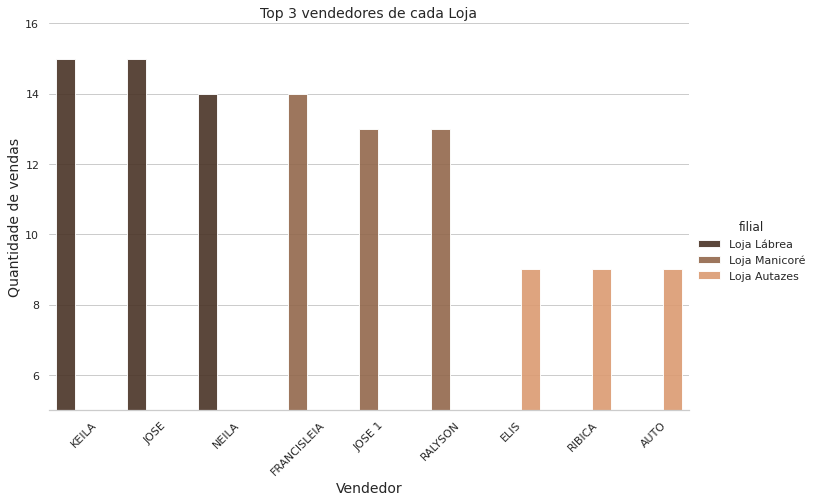

In [ ]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df_quemMaisVendeu.reset_index(), kind="bar",
    x="nome", y="quantidade_vendas", hue="filial",
    ci="df", palette="copper", alpha=0.9, height=6, aspect=1.6
)
g.despine(left=True)
g.set_axis_labels("Vendedor", "Quantidade de vendas", fontsize=14)
g.set_xticklabels(rotation=45, fontsize=11, ha='center')
plt.title("Top 3 vendedores de cada Loja", fontsize=14)
plt.ylim(5,16)
plt.show()
'''g.savefig("Gráfico - Top 3 vendedores de cada loja.png")'''

## Vizualizando a porcentagem de pedidos de **CPF NA NOTA** por unidade/loja <br>(Dados - Questão1)

In [ ]:
df_quantidade_cpfnanota = df_questao1['cpf_na_nota'].value_counts()
df_quantidade_cpfnanota_autazes = df_questao1[df_questao1['filial']=='Loja Autazes']['cpf_na_nota'].value_counts()
df_quantidade_cpfnanota_labrea = df_questao1[df_questao1['filial']=='Loja Lábrea']['cpf_na_nota'].value_counts()
df_quantidade_cpfnanota_manicore = df_questao1[df_questao1['filial']=='Loja Manicoré']['cpf_na_nota'].value_counts()

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0, 2.1, 0.9, 0.9])
ax1.pie(df_quantidade_cpfnanota, labels=['Solicitado','Não solicitado'], explode=(0, 0.1), autopct="%1.1f%%", shadow=True, startangle=60, textprops={'size':'12'})
ax1.set_title("CPF na Nota - Porcentagem de solicitações \nTODAS AS FILIAIS")

ax2 = fig.add_axes([0.95, 2.1, 0.9, 0.9])
ax2.pie(df_quantidade_cpfnanota_labrea, labels=['Solicitado','Não solicitado'], explode=(0, 0.1), autopct="%1.1f%%", shadow=True, startangle=60, textprops={'size':'12'})
ax2.set_title("CPF na Nota - Porcentabem de solicitações \nLOJA LÁBREA")

ax2 = fig.add_axes([0, 0.97, 0.9, 0.9])
ax2.pie(df_quantidade_cpfnanota_manicore, labels=['Solicitado','Não solicitado'], explode=(0, 0.1), autopct="%1.1f%%", shadow=True, startangle=60, textprops={'size':'12'})
ax2.set_title("CPF na Nota - Porcentagem de solicitações \nLOJA MANICORÉ")

ax2 = fig.add_axes([0.95, 0.97, 0.9, 0.9])
ax2.pie(df_quantidade_cpfnanota_autazes, labels=['Solicitado','Não solicitado'], explode=(0, 0.1), autopct="%1.1f%%", shadow=True, startangle=60, textprops={'size':'12'})
ax2.set_title("CPF na Nota - Porcentagem de solicitações \nLOJA AUTAZES")
fig.show()
'''fig.savefig("Gráfico - Porcentagem de pedidos de CPF na nota de cada loja.png")'''

## Visualizando a composição do valor do produdo (% de imposto em cima do produto) <br>(Dados - Questão1)

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.pie([df_questao1['valor_compra'].sum(),df_questao1['imposto'].sum()], labels=['Valor','Imposto'], explode=(0, 0.2), autopct="%1.1f%%", shadow=True, startangle=40, textprops={'size':'12'})
ax1.set_title("Composição do valor dos produtos", fontsize=14)
ax1.legend(['Valor do produto', 'Imposto'])
'''fig.savefig('Gráfico - Porcentagem de imposto.png')'''
fig.show()

## Vizualizando o total vendido (R$) em cada loja e o valor referente ao imposto <br>(Dados - Questão1)

In [ ]:
vendas_geral = df_questao1['valor_compra'].sum()
vendas_autazes = df_questao1[df_questao1['filial']=="Loja Autazes"]['valor_compra'].sum()
vendas_labrea = df_questao1[df_questao1['filial']=="Loja Lábrea"]['valor_compra'].sum()
vendas_manicore = df_questao1[df_questao1['filial']=="Loja Manicoré"]['valor_compra'].sum()

imposto_geral = df_questao1['imposto'].sum()
imposto_autazes = df_questao1[df_questao1['filial']=="Loja Autazes"]['imposto'].sum()
imposto_labrea = df_questao1[df_questao1['filial']=="Loja Lábrea"]['imposto'].sum()
imposto_manicore = df_questao1[df_questao1['filial']=="Loja Manicoré"]['imposto'].sum()

In [ ]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(18, 5))
sns.set_color_codes("pastel")
sns.barplot(x=[vendas_geral, vendas_manicore, vendas_labrea, vendas_autazes], y=['Todas', 'Loja Manicoré', 'Loja Lábrea', 'Loja Autazes'], label="Total", color="b")
sns.set_color_codes("muted")
sns.barplot(x=[imposto_geral, imposto_manicore, imposto_labrea, imposto_autazes], y=['Todas', 'Loja Manicoré', 'Loja Lábrea', 'Loja Autazes'], label="Imposto", color="b")
ax.set_title("Total vendido (R$) em cada loja", fontsize=14)
ax.legend(ncol=2, loc="lower right", frameon=True, fontsize=13)
ax.set(xlim=(0, 2000000), ylabel="",xlabel="Valor (R$) em milhão")
sns.despine(left=True, bottom=True)
plt.xticks(np.arange(0, 1900000, 200000), fontsize=12)
f.savefig('Gráfico - Total vendido em cada loja em reais.png')
plt.show()

## Quanto o dinheiro de volta rendeu em desconto <br>(Dados - Questão2)

*  <h3>Desconto total por produto e por filial/loja</h3>

In [ ]:
# Desconto total
df_desconto_total = df_questao2[['valor_unitario_sem_imposto','imposto','dinheiro_de_volta']].sum()
df_desconto_total = df_desconto_total['dinheiro_de_volta'] / (df_desconto_total['valor_unitario_sem_imposto'] + df_desconto_total['imposto']) * 100
df_desconto_total

In [ ]:
#Desconto por unidade
df_desconto_por_unidades = df_questao2.groupby(by=['unidade']).sum()[['valor_unitario_sem_imposto','imposto','dinheiro_de_volta']]
df_desconto_por_unidades = df_desconto_por_unidades['dinheiro_de_volta']/(df_desconto_por_unidades['valor_unitario_sem_imposto']+df_desconto_por_unidades['imposto']) * 100
df_desconto_por_unidades

In [ ]:
#Deixando o desconto total e o desconto por unidade em uma única Series
df_desconto_por_unidades = df_desconto_por_unidades.append(pd.Series({'Todas Unidades': df_desconto_total}))
df_desconto_por_unidades


In [ ]:
#Desconto por produto
df_desconto_por_produto = df_questao2.groupby(by=['produto']).sum()[['valor_unitario_sem_imposto','imposto','dinheiro_de_volta']]
df_desconto_por_produto = (df_desconto_por_produto['dinheiro_de_volta']/(df_desconto_por_produto['valor_unitario_sem_imposto']+df_desconto_por_produto['imposto']))*100
df_desconto_por_produto

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.5, 1])
ax1.bar(df_desconto_por_produto.index, df_desconto_por_produto)
ax1.set_title("Desconto total por produto", fontsize=13)
ax1.set_xlabel("Produto")
ax1.set_ylabel("Desconto (%)")

ax2 = fig.add_axes([0.65, 0.5, 0.3, 0.5])
ax2.bar(df_desconto_por_produto.index, df_desconto_por_produto)
ax2.set_title("Desconto total por produto", fontsize=13)
ax2.set_xlabel("Produto")
ax2.set_ylabel("Desconto (%)")
plt.ylim((1.50, 2.15))

ax3 = fig.add_axes([1.4, 0, 0.5, 1])
ax3.bar(df_desconto_por_unidades.index, df_desconto_por_unidades)
ax3.set_title("Desconto total por unidade", fontsize=13)
ax3.set_xlabel("Unidade")
ax3.set_ylabel("Desconto (%)")
ax3.set_xticklabels(df_desconto_por_unidades.index, rotation=30, ha='right')

ax4 = fig.add_axes([2.08, 0.5, 0.3, 0.5])
ax4.bar(df_desconto_por_unidades.index, df_desconto_por_unidades)
ax4.set_title("Desconto total por unidade", fontsize=13)
ax4.set_xlabel("Unidade")
ax4.set_ylabel("Desconto (%)")
ax4.set_xticklabels(df_desconto_por_unidades.index, rotation=30, ha='right')
plt.ylim((1.70, 1.75))
'''fig.savefig('Gráfico - Desconto total por produto e loja.png')'''
fig.show()

## Desconto dos produtos em relação a quantidade comprada <br>(Dados - Questão2)

In [ ]:
df_desconto_quantidade_produto = df_questao2.groupby(by=['produto', 'quantidade'])['valor_unitario_sem_imposto','imposto','dinheiro_de_volta'].sum()
df_desconto_quantidade_produto['desconto_%'] = round(df_desconto_quantidade_produto['dinheiro_de_volta']/(df_desconto_quantidade_produto['valor_unitario_sem_imposto']+df_desconto_quantidade_produto['imposto']) * 100, 2)
'''df_desconto_quantidade_produto.to_excel('Tabela - Desconto dos produtos em relação a quantidade.xlsx')'''
df_desconto_quantidade_produto

In [ ]:
width = 0.38
fig, ax = plt.subplots(figsize=(18,7))
rects1 = ax.bar(df_desconto_quantidade_produto.loc['Smart Med'].index - width/2, df_desconto_quantidade_produto.loc['Smart Med']['desconto_%'], width, label='Smart Med')
rects2 = ax.bar(df_desconto_quantidade_produto.loc['Smart Pro'].index + width/2, df_desconto_quantidade_produto.loc['Smart Pro']['desconto_%'], width, label='Smart Pro')
ax.set_ylabel('Desconto (%)', fontsize=13)
ax.set_xlabel('Quantidade comprada', fontsize=13)
ax.set_title('Desconto dos produtos em relação a quantidade comprada', fontsize=(14))
ax.legend(fontsize=13)
plt.xticks(np.arange(1, 20, 1.0))

def autolabel(rects, rects2):
    """Attach a text label above each bar in *rects*, displaying its height."""
    i = 0
    for rect in rects:
      if(i<4) :
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='left', va='bottom')
      else :
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
      i = i + 1
    i = 0
    for rect in rects2:
      if(i!=4) :
        i = i + 1
      else :
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1, rects2)
fig.tight_layout()
'''fig.savefig('Gráfico - Desconto dos produtos em relação a quantidade comprada.png')'''
plt.show()

## Venda por Vendedor <br>(Dados - Questão1)

* <h3>Concentração / Distribuição da quantidade de vendas dos vendedores de cada loja</h3>

In [ ]:
df_quantidade_vendas_por_vendedor = df_questao1.groupby(by=['filial','usuario','nome']).count()['num_compra'].reset_index()

In [ ]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize=(7, 8))
ax = sns.boxplot(x="filial", y="num_compra", data=df_quantidade_vendas_por_vendedor)
plt.title("Concentração / Distribuição da quantidade de vendas dos vendedores de cada loja", fontsize=14)
plt.xlabel("Filial", fontsize=14)
plt.ylabel("Quantidade de vendas", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,17)
f.savefig('Gráfico - concentração|distribuição da quantidade de vendas dos vendedores de cada loja.png')
f.show()

### Produto mais vendido <br>(Dados - Questão1)

* <h3>Top 10 produtos mais vendidos por loja</h3>


In [ ]:
df_vendas_produto = df_questao1.groupby(by=['filial', 'tipo_mercadoria']).count()['num_compra'].to_frame()
df_vendas_produto.reset_index(inplace=True)
df_vendas_produto_labrea = df_vendas_produto[df_vendas_produto['filial']=='Loja Lábrea'].nlargest(10, 'num_compra')
df_vendas_produto_manicore = df_vendas_produto[df_vendas_produto['filial']=='Loja Manicoré'].nlargest(10, 'num_compra')
df_vendas_produto_autazes = df_vendas_produto[df_vendas_produto['filial']=='Loja Autazes'].nlargest(10, 'num_compra')

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0, 0, 0.8, 1.2])
ax1.bar(df_vendas_produto_labrea['tipo_mercadoria'], df_vendas_produto_labrea['num_compra'])
ax1.set_title("Produtos mais vendidos \nLoja Lábrea", fontsize=14)
ax1.set_xlabel("Produto", fontsize=14)
ax1.set_ylabel("Quantidade", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.xticks(rotation=45, ha='right', fontsize=11)

ax1 = fig.add_axes([1, 0, 0.8, 1.2])
ax1.bar(df_vendas_produto_manicore['tipo_mercadoria'], df_vendas_produto_manicore['num_compra'])
ax1.set_title("Produtos mais vendidos \nLoja Manicoré", fontsize=14)
ax1.set_xlabel("Produto", fontsize=14)
ax1.set_ylabel("Quantidade", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=11)

ax1 = fig.add_axes([2, 0, 0.8, 1.2])
ax1.bar(df_vendas_produto_autazes['tipo_mercadoria'], df_vendas_produto_autazes['num_compra'])
ax1.set_title("Produtos mais vendidos \nLoja Autazes", fontsize=14)
ax1.set_xlabel("Produto", fontsize=14)
ax1.set_ylabel("Quantidade", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=11)
'''fig.savefig('Gráfico - Top 10 produtos mais vendidos por loja.png')'''
fig.show()